# Analytical Models with Reaction Terms

This section discussed modifications to the advection-dispersion equation (ADE), which describes the movement of a contaminant through an aquifer, accounting for two key processes: advection (the movement of contaminants with the flow of the medium) and dispersion (the spreading of contaminants due to velocity variations and molecular diffusion). Practical applications are often more complex, requiring us to consider reaction terms, which model processes such as chemical decay, adsorption, and desorption.

Herein, we examine solutions to the advection-dispersion equation in several dimensions, with the addition of:

- First-order decay, which accounts for the transformation or degradation of the contaminant over time (e.g., radioactive decay or biodegradation).
- Adsorption/desorption processes, which describe the interaction between the contaminant and the surrounding porous medium through a linear equilibrium isotherm. This process is crucial for modeling how contaminants are temporarily stored in and released from the medium.

**Governing Equation**

The generalized advection-dispersion equation with reaction terms in multiple dimensions is written as:

$$ (1+\frac{\rho_b}{n} K_d)\frac{\partial C}{\partial t} =  \nabla \cdot (D \nabla C - VC) - \lambda C $$

where:

- $C(x,y,z,t)$ is the contaminant concentration as a function of space and time.
- $V$is the velocity field (advection term).
- $D$ is the dispersion tensor, accounting for spreading in multiple directions.
- $\lambda$ is the first-order decay constant, representing the rate at which the contaminant decays.
- $\rho_b$ is the bulk density of the porous medium.
- $K_d$ is the distribution coefficient for linear adsorption/desorption, characterizing how the contaminant adheres to or detaches from the medium.

The addition of the reaction terms, such as the decay constant $\lambda$ and adsorption/desorption, significantly alters the transport dynamics. Understanding these interactions is essential for predicting the long-term fate and transport of contaminants in the environment, especially in cases where chemical reactions play a dominant role.

**Solutions**

Generally our prior solutions can be used with modifications to account for the new processes.  If the adsorbtion/desorbtion behavior is reasonably described by a linear equilibrium isotherm, the constant on the left $1 + \frac{\rho_b}{n} K_d = R$ (the retardation factor) is approximated by a temporal adjustment called adjusted time (or just divide the other constants by $R$.)

The 1st order decay term usually adjusts apparent velocity, and source concentration.

## Ogata-Banks with Retardation

Adding the retardation effect is a simple metter of adjusting the various transport constants (assuming $\lambda = 0$)

Below are a couple of spreadsheets that implement the modifications

### Profile Spreadsheet

[OB-ADR-Profile](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/OgataBanksRetardationProfile.xlsx)

### History Spreadsheet

[OB-ADR-History](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/OgataBanksRetardationHistory.xlsx)

## Ogata-Banks with Retardation and Decay

Adding the decay effect requires some consideration of travel time and elapsed time, then applying exponential decay to the entire transport result.

Below are a couple of spreadsheets that implement the modifications

### Profile Spreadsheet

[OB-ADRD-Profile](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/OgataBanksRetardationDecayProfile.xlsx) 

:::{note}
I am not entirely confident this particular spreadsheet is correct; so if you use it professionally, check against some known solution before donating your double-wide to an attourney!
:::

### History Spreadsheet

[OB-ADRD-History](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/OgataBanksRetardationDecayHistory.xlsx)

## Sauty with Retardation

Adding the retardation effect is a simple metter of adjusting the various transport constants (assuming $\lambda = 0$)

:::{warning}
This section in-progress, links below may be 404s
:::

Below are a couple of spreadsheets that implement the modifications

### Profile Spreadsheet

[S-ADR-Profile](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/SautyRetardationProfile.xlsx)

### History Spreadsheet

[S-ADR-History](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/SautyRetardationHistory.xlsx)

## Sauty with Retardation and Decay

Adding the decay effect requires some consideration of travel time and elapsed time, then applying exponential decay to the entire transport result.

:::{warning}
This section in-progress, links below may be 404s
:::

Below are a couple of spreadsheets that implement the modifications

### Profile Spreadsheet

[S-ADRD-Profile](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/SautyRetardationDecayProfile.xlsx) 

:::{note}
I am not entirely confident this particular spreadsheet is correct; so if you use it professionally, check against some known solution before donating your double-wide to an attourney!
:::

### History Spreadsheet

[S-ADRD-History](http://54.243.252.9/ce-5364-webroot/6-Spreadsheets/SautyRetardationDecayHistory.xlsx)

## A 2D Model

:::{warning}
This section in-progress, more description pending
:::

Below is a script for a 2D situation, you can use it for 1D problem by specifying a large value for $+/- Y$.

In [1]:
import math
from scipy.special import erf, erfc

def c2adrl(conc0, distx, disty, dispx, dispy, velocity, time, lenY, retardation, _lambda):
    vadj = velocity / retardation
    dispXadj = dispx / retardation
    dispYadj = dispy / retardation
    lambadj = _lambda / retardation

    uuu = math.sqrt(1.0 + 4.0*lambadj*dispXadj/vadj)
    ypp = (disty + 0.5*lenY) / (2*math.sqrt(dispYadj*distx))
    ymm = (disty - 0.5*lenY) / (2*math.sqrt(dispYadj*distx))

    arg1 = (distx - vadj*time*uuu) / (2*math.sqrt(dispXadj*vadj*time))
    arg2 = (distx / (2*dispXadj)) * (1 - uuu)

    term0 = conc0 / 4
    term1 = math.exp(arg2)
    term2 = erfc(arg1)
    term3 = (erf(ypp) - erf(ymm))

    c2adrl = term0 * term1 * term2 * term3
    return c2adrl

x=  100  y=  5000  t=  100.0  C(x,y,t) =  0.0


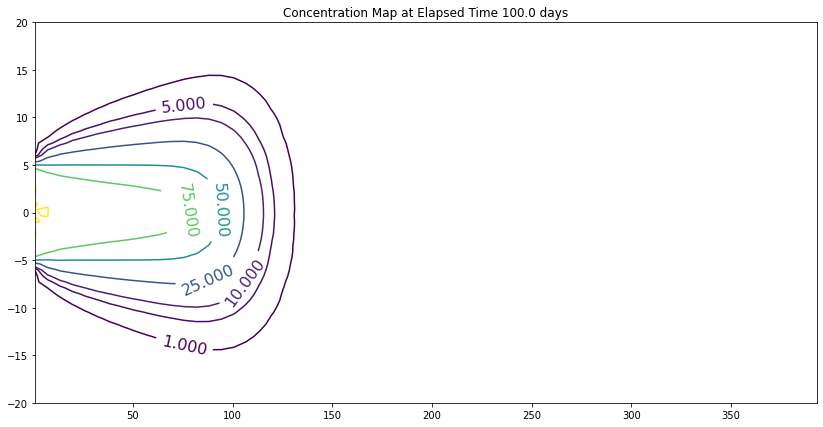

In [3]:
# inputs
c_initial = 100.0
xx = 100
yy = 5000
Dx = 1.0
Dy = 0.1
V = 1.0
time = 100.0
Y = 10.0
R = 1.0
LAM = 0.00001

output=c2adrl(c_initial, xx, yy, Dx, Dy, V, time, Y, R, LAM)
print("x= ",round(xx,2)," y= ",round(yy,2)," t= ",round(time,1)," C(x,y,t) = ",round(output,3))

# make a plot
x_max = 400
y_max = 20
# build a grid
nrows = 50   
deltax = (x_max)/nrows
x = []
x.append(1)
for i in range(nrows):
    if x[i] == 0.0:
        x[i] = 0.00001
    x.append(x[i]+deltax)

ncols = 50   
deltay = (y_max*2)/(ncols-1)
y = []
y.append(-y_max)
for i in range(1,ncols):
    if y[i-1] == 0.0:
        y[i-1] = 0.00001
    y.append(y[i-1]+deltay)
    
#y

#y = [i*deltay for i in range(how_many_points)] # constructor notation
#y[0]=0.001
ccc = [[0 for i in range(nrows)] for j in range(ncols)]

for jcol in range(ncols):
    for irow in range(nrows):
        ccc[irow][jcol] = c2adrl(c_initial, x[irow], y[jcol], Dx, Dy, V, time, Y, R, LAM)
        
#y

my_xyz = [] # empty list
count=0
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([ x[irow],y[jcol],ccc[irow][jcol] ])
       # print(count)
        count=count+1
        
#print(len(my_xyz))

import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
#print(min(coord_x), max(coord_x)) # activate to examine the dataframe
#print(min(coord_y), max(coord_y))
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 64)
lat = numpy.linspace(min(coord_y), max(coord_y), 64)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = [1,5,10,25,50,75,100])
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Concentration Map at Elapsed Time '+ str(round(time,1))+' days');
